In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
#from wordcloud import WordCloud, ImageColorGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

tnews = fetch_20newsgroups(subset="train", remove=('headers', 'footers', 'quotes'))

In [2]:
print("DESCR: ", tnews.DESCR)

DESCR:  .. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimens

In [3]:
print("keys: ", tnews.keys())
print("target_names: ", list(tnews.target_names))
print("target: ", list(tnews.target))
print("filenames: ", tnews.filenames[1])
print("Ex: ", tnews.data[1])


keys:  dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
target_names:  ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
target:  [7, 4, 4, 1, 14, 16, 13, 3, 2, 4, 8, 19, 4, 14, 6, 0, 1, 7, 12, 5, 0, 10, 6, 2, 4, 1, 12, 9, 15, 7, 6, 13, 12, 17, 18, 10, 8, 11, 8, 16, 9, 4, 3, 9, 9, 4, 4, 8, 12, 14, 5, 15, 2, 13, 17, 11, 7, 10, 2, 14, 12, 5, 4, 6, 7, 0, 11, 16, 0, 6, 17, 7, 12, 7, 3, 12, 11, 7, 2, 2, 0, 16, 1, 2, 7, 3, 2, 1, 10, 12, 12, 17, 12, 2, 8, 8, 18, 5, 0, 1, 6, 12, 8, 4, 17, 12, 12, 12, 1, 6, 18, 4, 3, 10, 9, 0, 13, 11, 5, 14, 15, 8, 4, 15, 15, 1, 0, 16, 9, 8, 6, 13, 6, 17, 14, 0, 9, 1, 2, 15, 13, 9, 2, 8, 2, 13, 2, 0, 15, 

$\textit{TFIDF/CV - Matriz DT}$

In [14]:
tfidf1 = TfidfVectorizer(ngram_range=(1,1), stop_words="english")
tfidf2 = TfidfVectorizer(ngram_range=(1,2), stop_words="english")
cv1 = CountVectorizer(ngram_range=(1,1), stop_words="english")
cv2 = CountVectorizer(ngram_range=(1,2), stop_words="english")

vectorization1 = tfidf1.fit_transform(tnews.data)
vocabulary1 = tfidf1.get_feature_names_out()
vectorization2 = tfidf2.fit_transform(tnews.data)
vocabulary2 = tfidf2.get_feature_names_out()

vectorization3 = cv1.fit_transform(tnews.data)
vocabulary3 = cv1.get_feature_names_out()
vectorization4 = cv2.fit_transform(tnews.data)
vocabulary4 = cv2.get_feature_names_out()

In [5]:
def getSimilarity(vectors, ref):
    
    # Hacemos un diccionario para agrupar los articulos por categoria
    articles_by_category = {}
    matriz_similaridad = cosine_similarity(vectors)

    for i, category in enumerate(tnews.target_names):
        category_articles = np.array([[tnews.data[j], j] for j in range(len(tnews.data)) if tnews.target[j] == i])
        articles_by_category[category] = category_articles

    reference_article = int(random.choice(articles_by_category[ref][..., 1]))

    same_category_similarity = [matriz_similaridad[reference_article, int(j)] for j in articles_by_category[ref][..., 1] if int(j) != reference_article]
    diff_category_similarity = [matriz_similaridad[reference_article, j] for j in range(matriz_similaridad.shape[0]) if j not in articles_by_category[ref][..., 1]]
    
    return same_category_similarity, diff_category_similarity

same1, diff1 = getSimilarity(vectorization1, 'sci.electronics')
same2, diff2 = getSimilarity(vectorization2, 'sci.electronics')
same3, diff3 = getSimilarity(vectorization3, 'sci.electronics')
same4, diff4 = getSimilarity(vectorization4, 'sci.electronics')

C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_16328\2994576052.py:15: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  diff_category_similarity = [matriz_similaridad[reference_article, j] for j in range(matriz_similaridad.shape[0]) if j not in articles_by_category[ref][..., 1]]


Como es de esperar, los articulos de otras categorias tienen menos similitud coseno que los articulos del mismo tipo.

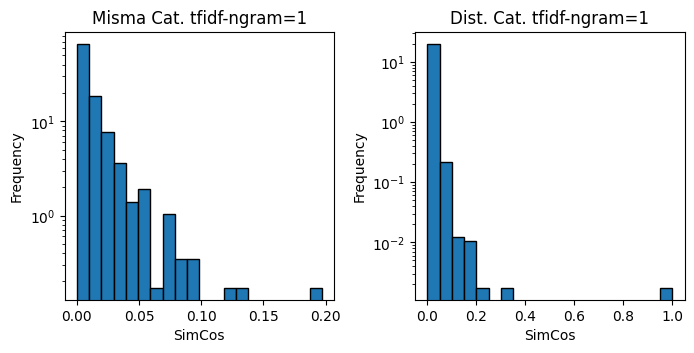

In [17]:
plt.figure(figsize=(8,8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

plt.subplot(2, 2, 1)
plt.hist(same1, edgecolor='black', bins=20, density=True, log=True)
plt.xlabel('SimCos')
plt.ylabel('Frequency')
plt.title('Misma Cat. tfidf-ngram=1')

plt.subplot(2, 2, 2)
plt.hist(diff1, edgecolor='black', bins=20, density=True, log=True)
plt.xlabel('SimCos')
plt.ylabel('Frequency')
plt.title('Dist. Cat. tfidf-ngram=1')

plt.show()

Como la vectorizacion TFIDF penaliza las palabras que aparecen muchas veces en el corpus, se interpreta que los resultados son los esperados, ya que la similitud coseno entre los documentos de la misma categoria usando este metodo son menor en comparacion a la vectorizacion CV.

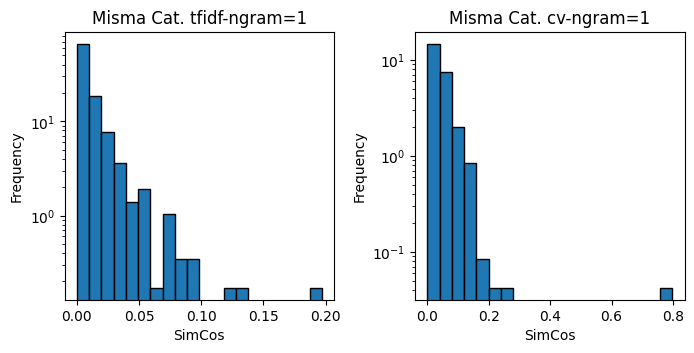

In [15]:
plt.figure(figsize=(8,8))

plt.subplot(2, 2, 1)
plt.hist(same1, edgecolor='black', bins=20, density=True, log=True)
plt.xlabel('SimCos')
plt.ylabel('Frequency')
plt.title('Misma Cat. tfidf-ngram=1')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

plt.subplot(2, 2, 2)
plt.hist(same3, edgecolor='black', bins=20, density=True, log=True)
plt.xlabel('SimCos')
plt.ylabel('Frequency')
plt.title('Misma Cat. cv-ngram=1')

plt.show()

Se observo que al agrandar los n_gramas de 1 a 1 y 2, la similitud entre textos de del mismo tipo es mayor. Contrariamente, se observo que al agrandar los n_gramas de 1 a 1 y 2, la similitud entre textos de distinto tipo es menor.

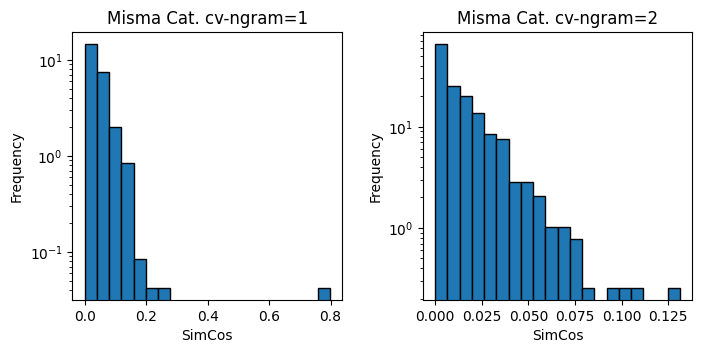

In [8]:
plt.figure(figsize=(8,8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

plt.subplot(2, 2, 1)
plt.hist(same3, edgecolor='black', bins=20, density=True, log=True)
plt.xlabel('SimCos')
plt.ylabel('Frequency')
plt.title('Misma Cat. cv-ngram=1')

plt.subplot(2, 2, 2)
plt.hist(same4, edgecolor='black', bins=20, density=True, log=True)
plt.xlabel('SimCos')
plt.ylabel('Frequency')
plt.title('Misma Cat. cv-ngram=2')

plt.show()

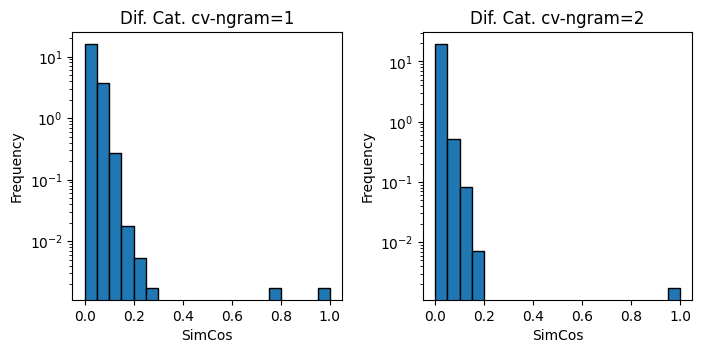

In [9]:
plt.figure(figsize=(8,8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

plt.subplot(2, 2, 1)
plt.hist(diff3, edgecolor='black', bins=20, density=True, log=True)
plt.xlabel('SimCos')
plt.ylabel('Frequency')
plt.title('Dif. Cat. cv-ngram=1')

plt.subplot(2, 2, 2)
plt.hist(diff4, edgecolor='black', bins=20, density=True, log=True)
plt.xlabel('SimCos')
plt.ylabel('Frequency')
plt.title('Dif. Cat. cv-ngram=2')

plt.show()

$\textit{Ahora con TSVD}$

In [18]:
svd = TruncatedSVD(n_components=32)
svd.fit(vectorization1)
transformed = svd.transform(vectorization1)
transformed.shape

(11314, 32)

$\textit{TFIDF/CV - Matriz TD}$

$\textit{Matriz TC}$

In [11]:
vectorization1 ## Documento Termino


<11314x101322 sparse matrix of type '<class 'numpy.float64'>'
	with 755809 stored elements in Compressed Sparse Row format>